In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import scipy
import nltk
from scipy.sparse import coo_matrix, hstack
from nltk.stem.snowball import SnowballStemmer

In [100]:
train = pd.read_csv('G:/Downloads/crowdflower-search-relevance/train.csv/train.csv')
test = pd.read_csv('G:/Downloads/crowdflower-search-relevance/test.csv/test.csv')
sample = pd.read_csv('G:/Downloads/crowdflower-search-relevance/sampleSubmission.csv/sampleSubmission.csv')

In [101]:
data = pd.concat([train, test])

In [53]:
data['query'].nunique()

261

In [6]:
j = 1
file_names = []
for i in data['query'].unique():
    df = data[data['query']==i]
    k = 'C:/Users/Dindar/crowdflower/tables/' + str(j) + '_' + str(i.split(' ')[0]) + '.csv'
    df.to_csv(k, index=False)
    file_names.append(k)
    j += 1

In [102]:
stop_words = set(stopwords.words('english')) 
stemmer = SnowballStemmer("english")
def listToString(s):  
    str1 = ""  
    for ele in s:  
        str1 = str1 + ' ' + ele      
    return str1[1:]

In [104]:
%%time
result = []
n = 1
for i in file_names:
    df = pd.read_csv(i)
    df['product_description'].fillna('0', inplace=True)
    df['median_relevance'].fillna(0, inplace=True)
    tr = df[df['median_relevance'] > 0].index
    ts = df[df['median_relevance'] == 0].index
    sp = tr.shape[0]
    df['query'] = df['query'].str.lower()
    df['product_title'] = df['product_title'].str.lower()
    df['product_description'] = df['product_description'].str.lower()
    df['query'] = df['query'].str.split()
    df['product_title'] = df['product_title'].str.split()
    df['product_description'] = df['product_description'].str.split()
    df['query'] = df['query'].apply(lambda x: [stemmer.stem(y) for y in x])
    df['product_title'] = df['product_title'].apply(lambda x: [stemmer.stem(y) for y in x])
    df['product_description'] = df['product_description'].apply(lambda x: [stemmer.stem(y) for y in x])
    df['query'] = df['query'].apply(listToString)
    df['product_title'] = df['product_title'].apply(listToString)
    df['product_description'] = df['product_description'].apply(listToString)
    vectorizer1 = CountVectorizer(stop_words=stop_words, ngram_range=(1,4))
    vectorizer2 = CountVectorizer(stop_words=stop_words, ngram_range=(1,4))

    X1 = vectorizer1.fit_transform(df['product_title'])
    X2 = vectorizer2.fit_transform(df['product_description'])
    d = hstack([X1,X2])
    t = d.A[:sp]
    X_train, X_test, y_train, y_test = train_test_split(t, df['median_relevance'][:sp], 
                                                    test_size=0.3, random_state=123)
    xgb = XGBClassifier(n_estimators=100, n_jobs=-1)
    xgb.fit(X_train, y_train)
    y = xgb.predict(X_test)
    print(str(n) + ' : ' + str(cohen_kappa_score(y_test,y,weights='quadratic')))
        
    xgb = XGBClassifier(n_estimators=200, n_jobs=-1)
    xgb.fit(t, df['median_relevance'].iloc[tr])
    y_preds = xgb.predict(d.A[sp:])
    
    a = list(df['id'].iloc[ts])
    b = list(y_preds)
    ddd = dict(zip(a,b))
    result.append(ddd)
    n += 1

1 : 0.7257383966244726
2 : 0.0
3 : 0.5803108808290155
4 : 0.05882352941176472
5 : -0.365296803652968
6 : -0.47058823529411775
7 : 0.6875
8 : 0.05405405405405406
9 : 0.4199475065616799
10 : 0.0
11 : 0.0
12 : 0.36842105263157887
13 : 0.0
14 : 0.0
15 : 0.0
16 : 0.13669064748201443
17 : 0.0
18 : -0.47368421052631593
19 : 0.9473684210526316
20 : 0.08695652173913049
21 : 0.0
22 : 0.3571428571428571
23 : 0.24137931034482762
24 : 0.6405228758169934
25 : 0.0
26 : 0.3142857142857143
27 : 0.0
28 : 0.0
29 : 0.0
30 : 0.08383233532934142
31 : 0.0
32 : 0.7894736842105263
33 : 0.0
34 : 0.0
35 : 0.7575757575757576
36 : 0.73


C:\Users\Dindar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:604: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


37 : nan
38 : 0.0
39 : -0.18867924528301883
40 : -0.21621621621621623
41 : 0.5
42 : 0.3571428571428572
43 : 0.34782608695652173
44 : 0.460431654676259
45 : 0.8428571428571429
46 : 0.0
47 : 0.181818181818182
48 : 0.0
49 : 0.0
50 : 0.8163265306122449
51 : 0.625
52 : 0.5151515151515151
53 : nan
54 : 0.6231884057971016
55 : -0.11111111111111116
56 : 0.5714285714285714
57 : 0.13043478260869568
58 : 0.3606557377049181
59 : 0.0
60 : 0.625
61 : 0.07692307692307687
62 : -0.25
63 : 0.9056603773584906
64 : -0.07142857142857162
65 : 0.0
66 : 0.0
67 : -0.11678832116788329
68 : 0.375
69 : 0.8807339449541284
70 : -0.08450704225352124
71 : 0.0
72 : 0.0
73 : 0.5985401459854014
74 : 0.1807228915662651
75 : -0.5292841648590021
76 : nan
77 : 0.0
78 : 0.43243243243243246
79 : 0.5980066445182723
80 : 0.0
81 : 0.6974063400576369
82 : 0.0
83 : 1.0
84 : 0.339622641509434
85 : nan
86 : 0.0
87 : 0.5423728813559322
88 : 0.06299212598425197
89 : 0.0
90 : 0.7878787878787878
91 : 0.8732394366197183
92 : 0.25
93 : 0.

In [59]:
len(result)

261

In [76]:
d1 = {}
for i in result:
    d1.update(i)

In [73]:
len(d1)

22513

In [74]:
test.shape

(22513, 4)

In [80]:
pred = pd.DataFrame({'id':list(d1.keys()), 'preds':list(d1.values())})

In [81]:
pred

,id,preds
0,294,1.0
1,606,1.0
2,1287,1.0
3,2827,2.0
4,2932,1.0
...,...,...
22508,4692,1.0
22509,8606,1.0
22510,18028,4.0
22511,21296,1.0


In [86]:
test['id'].max()

32671

In [85]:
pred['id'].max()

32671

In [88]:
pred = pred.sort_values(by=['id'])

In [89]:
pred

,id,preds
11114,3,4.0
17871,6,4.0
7000,9,3.0
4733,11,3.0
20839,12,4.0
...,...,...
20555,32665,2.0
16253,32667,4.0
7401,32669,2.0
10722,32670,3.0


In [90]:
test

,id,query,product_title,product_description
0,3,electric griddle,Star-Max 48 in Electric Griddle,NaN
1,6,phillips coffee maker,Philips SENSEO HD7810 WHITE Single Serve Pod C...,NaN
2,9,san francisco 49ers,2013 San Francisco 49ers Clock,A 2013 San Francisco 49ers clock is the ultima...
3,11,aveeno shampoo,AVEENO 10.5FLOZ NRSH SHINE SH,"Water, Ammonium Lauryl Sulfate, Dimethicone, S..."
4,12,flea and tick control for dogs,Merial Frontline Plus Flea and Tick Control fo...,NaN
...,...,...,...,...
22508,32665,seagate 2tb hard disk,Seagate Backup Plus STDU4000100 4 TB 3.5 Exter...,"Founded in 1979, Seagate is the leading provid..."
22509,32667,storage ottoman,"Chevron Storage Ottoman, Gray and White",Whether it be to hide away clutter in the room...
22510,32669,gym gloves,Lion Martial Arts Large Red Grappling Glove Pair,The Grappling Gloves are built to serve and pr...
22511,32670,wreck it ralph,Wreck-It Ralph (Original Score),"The team behind Disney's Wreck-It Ralph, the t..."


In [92]:
sample['prediction'] = pred['preds']

In [97]:
sample.to_csv('G:/Downloads/crowdflower-search-relevance/sampleSubmission.csv/sampleSubmission.csv',index=False)

In [96]:
sample['prediction'] = sample['prediction'].astype('int32')

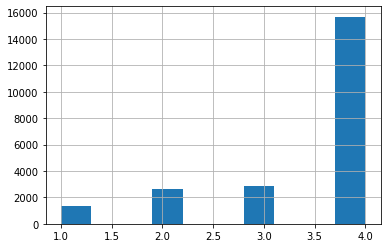

In [98]:
sample['prediction'].hist()

In [49]:
df

,id,query,product_title,product_description,median_relevance,relevance_variance
0,1,bridal shower decorations,Accent Pillow with Heart Design - Red/Black,Red satin accent pillow embroidered with a hea...,1.0,0.000
1,2592,bridal shower decorations,Personalized Bridal Shower Banner 36,Hang our Personalized Bridal Shower Banner to ...,4.0,0.943
2,3029,bridal shower decorations,Hers Accent Pillow - White,NaN,1.0,0.000
3,3989,bridal shower decorations,DDI 1122249 Bridal Shower Party 192 Piece Ship...,Bridal Shower Party Decor - 192 Piece Shipper ...,1.0,0.471
4,4786,bridal shower decorations,"Bride to Be"" Floral Banner - Coral""","details\nUse as a photo prop or deocration, wh...",2.0,1.020
...,...,...,...,...,...,...
114,29565,bridal shower decorations,Bridal Shower Personalized Photo Banner 24,Celebrate a bridal shower with our Bridal Show...,NaN,NaN
115,29726,bridal shower decorations,Tissue Paper Garland 9'-White,DARICE-Victoria Lynn: Bridal Paper Heart Garla...,NaN,NaN
116,30464,bridal shower decorations,Pink Bag Of Rose Petals,This 9 inch by 9 inch Bag of Rose Petals is a ...,NaN,NaN
117,31676,bridal shower decorations,Party Deco 04507 18 ft. Black Star Wire Garlan...,"Party Deco is your complete source for luau, b...",NaN,NaN


In [36]:
df = pd.read_csv('C:/Users/Dindar/crowdflower/tables/1_bridal.csv')

In [9]:
df.drop('id',axis=1, inplace=True)
df['product_description'].fillna('0', inplace=True)
df['median_relevance'].fillna(0, inplace=True)

In [10]:
tr = df[df['median_relevance'] > 0].index
ts = df[df['median_relevance'] == 0].index

In [11]:
tr.shape, ts.shape

((43,), (76,))

In [12]:
stop_words = set(stopwords.words('english')) 

In [13]:
df['query'] = df['query'].str.lower()
df['product_title'] = df['product_title'].str.lower()
df['product_description'] = df['product_description'].str.lower()

In [14]:
df['query'] = df['query'].str.split()
df['product_title'] = df['product_title'].str.split()
df['product_description'] = df['product_description'].str.split()

In [15]:
stemmer = SnowballStemmer("english")

In [16]:
df['query'] = df['query'].apply(lambda x: [stemmer.stem(y) for y in x])
df['product_title'] = df['product_title'].apply(lambda x: [stemmer.stem(y) for y in x])
df['product_description'] = df['product_description'].apply(lambda x: [stemmer.stem(y) for y in x])

In [17]:
def listToString(s):  
    str1 = ""  
    for ele in s:  
        str1 = str1 + ' ' + ele      
    return str1[1:]

In [18]:
df['query'] = df['query'].apply(listToString)
df['product_title'] = df['product_title'].apply(listToString)
df['product_description'] = df['product_description'].apply(listToString)

In [19]:
vectorizer1 = CountVectorizer(stop_words=stop_words, ngram_range=(1,4))
vectorizer2 = CountVectorizer(stop_words=stop_words, ngram_range=(1,4))

X1 = vectorizer1.fit_transform(df['product_title'])
X2 = vectorizer2.fit_transform(df['product_description'])

In [20]:
d = hstack([X1,X2])

In [21]:
t = d.A[:43]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(t, df['median_relevance'][:43], 
                                                    test_size=0.3, random_state=123)

In [23]:
from xgboost import XGBClassifier
from sklearn.metrics import cohen_kappa_score

In [28]:
%%time
xgb = XGBClassifier(eval_metric='mlogloss', n_estimators=150, n_jobs=-1)
xgb.fit(X_train, y_train)

Wall time: 1.73 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=-1,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
y_preds = xgb.predict(X_test)
cohen_kappa_score(y_test,y_preds,weights='quadratic')

0.7257383966244726

In [30]:
import numpy as np
import pandas as pd
import os
import scipy as sp
from functools import partial
from sklearn import metrics
from collections import Counter
import json

In [31]:
class OptimizedRounder(object):
    def __init__(self):
        self.coef_ = 0

    def _kappa_loss(self, coef, X, y):
        X_p = np.copy(X)
        for i, pred in enumerate(X_p):
            if pred < coef[0]:
                X_p[i] = 0
            elif pred >= coef[0] and pred < coef[1]:
                X_p[i] = 1
            elif pred >= coef[1] and pred < coef[2]:
                X_p[i] = 2
            elif pred >= coef[2] and pred < coef[3]:
                X_p[i] = 3
            else:
                X_p[i] = 4

        ll = metrics.cohen_kappa_score(y, X_p, weights='quadratic')
        return -ll

    def fit(self, X, y):
        loss_partial = partial(self._kappa_loss, X=X, y=y)
        initial_coef = [0.5, 1.5, 2.5, 3.5]
        self.coef_ = sp.optimize.minimize(loss_partial, initial_coef, method='nelder-mead')

    def predict(self, X, coef):
        X_p = np.copy(X)
        for i, pred in enumerate(X_p):
            if pred < coef[0]:
                X_p[i] = 0
            elif pred >= coef[0] and pred < coef[1]:
                X_p[i] = 1
            elif pred >= coef[1] and pred < coef[2]:
                X_p[i] = 2
            elif pred >= coef[2] and pred < coef[3]:
                X_p[i] = 3
            else:
                X_p[i] = 4
        return X_p

    def coefficients(self):
        return self.coef_['x']

In [32]:
optR = OptimizedRounder()
optR.fit(y_preds, y_test)
coefficients = optR.coefficients()
valid_predictions = optR.predict(y_preds, coefficients)

In [33]:
valid_predictions

array([4., 1., 2., 2., 1., 4., 4., 4., 2., 1., 2., 4., 1.])

In [34]:
y_preds

array([4., 1., 2., 2., 1., 4., 4., 4., 2., 1., 2., 4., 1.])

In [35]:
coefficients

array([0.5, 1.5, 2.5, 3.5])

In [25]:
df[:30]

,query,product_title,product_description,median_relevance,relevance_variance
0,led christma light,set of 10 batteri oper multi led train christm...,set of 10 batteri oper train christma light it...,4.0,0.000
1,led christma light,set of 96 twinkl warm white led christma light...,set of 96 twinkl warm white led christma light...,4.0,0.000
2,led christma light,swirl led light christma tree glitterdom figur...,pack of 2 winter scene swirl led light christm...,2.0,0.000
3,led christma light,6' pre-lit medium white american spruce upsid ...,6' pre-lit medium white american spruce upsid ...,4.0,0.471
4,led christma light,"35 warm white 5mm led christma lights, white w...",wintergreen light 5mm wide angl led 35 mini li...,4.0,0.000
5,led christma light,set of 35 cool white c6 led christma light - g...,set of 35 cool white c6 led christma light - g...,4.0,0.000
6,led christma light,lightshar 4-foot 48-light warm white led birch...,"bendabl branches, conveni instal and embed lon...",4.0,0.471
7,led christma light,set of 100 pure white led wide angl christma l...,product features: color: pure white bulb / gre...,2.0,0.471
8,led christma light,18 multi-color led indoor/outdoor christma rop...,18 foot long christma rope light item #x491840...,4.0,0.000
9,led christma light,2à_à_ pre-lit black pine artifici halloween ...,pre-lit with 25 orang led light bulb size: g12...,2.0,0.866


In [92]:
len(vectorizer2.vocabulary_)

7966

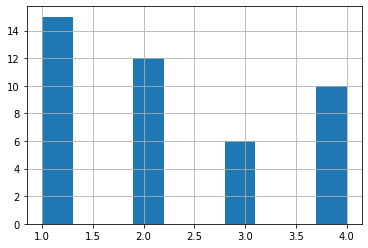

In [94]:
df['median_relevance'].iloc[tr].hist()

In [123]:
y_preds

array([4., 4., 4., 4., 4., 1., 4., 4., 4., 4., 1., 4., 2., 4., 4., 4., 4.,
       4.])

In [124]:
y_test

41    4.0
40    4.0
13    4.0
51    4.0
27    1.0
26    1.0
54    4.0
39    2.0
18    4.0
23    4.0
30    1.0
29    4.0
11    2.0
0     4.0
5     4.0
10    4.0
49    1.0
8     4.0
Name: median_relevance, dtype: float64

In [46]:
indexx = df.loc[pd.isna(df["product_description"]), :].index

In [47]:
df.iloc[indexx]

,id,query,product_title,product_description,median_relevance,relevance_variance
2,3029,bridal shower decorations,Hers Accent Pillow - White,NaN,1.0,0.000
6,5535,bridal shower decorations,Bridal Shower Personalized Photo Banner 48,NaN,2.0,0.471
13,10048,bridal shower decorations,Bridal Shower Personalized Photo Banner 72,NaN,2.0,0.800
22,17361,bridal shower decorations,Spritz Large Clothespins Gold 10 Ct,NaN,2.0,0.471
34,26648,bridal shower decorations,Bridal Shower Personalized Photo Banner 24,NaN,2.0,0.748
39,30471,bridal shower decorations,Chalk Board Frame - Black,NaN,1.0,0.000
46,2827,bridal shower decorations,Wedding & Bridal Shower Personalized Napkins,NaN,NaN,NaN
57,6584,bridal shower decorations,Personalized Bridal Shower Banner 60,NaN,NaN,NaN
61,7868,bridal shower decorations,Bridal Shower Personalized Photo Banner 18,NaN,NaN,NaN
62,8254,bridal shower decorations,Porcelain Double Hearts Cake Top - Off White,NaN,NaN,NaN


In [42]:
df

,id,query,product_title,product_description,median_relevance,relevance_variance
0,1,bridal shower decorations,Accent Pillow with Heart Design - Red/Black,Red satin accent pillow embroidered with a hea...,1.0,0.000
1,2592,bridal shower decorations,Personalized Bridal Shower Banner 36,Hang our Personalized Bridal Shower Banner to ...,4.0,0.943
2,3029,bridal shower decorations,Hers Accent Pillow - White,NaN,1.0,0.000
3,3989,bridal shower decorations,DDI 1122249 Bridal Shower Party 192 Piece Ship...,Bridal Shower Party Decor - 192 Piece Shipper ...,1.0,0.471
4,4786,bridal shower decorations,"Bride to Be"" Floral Banner - Coral""","details\nUse as a photo prop or deocration, wh...",2.0,1.020
...,...,...,...,...,...,...
114,29565,bridal shower decorations,Bridal Shower Personalized Photo Banner 24,Celebrate a bridal shower with our Bridal Show...,NaN,NaN
115,29726,bridal shower decorations,Tissue Paper Garland 9'-White,DARICE-Victoria Lynn: Bridal Paper Heart Garla...,NaN,NaN
116,30464,bridal shower decorations,Pink Bag Of Rose Petals,This 9 inch by 9 inch Bag of Rose Petals is a ...,NaN,NaN
117,31676,bridal shower decorations,Party Deco 04507 18 ft. Black Star Wire Garlan...,"Party Deco is your complete source for luau, b...",NaN,NaN


In [7]:
['C:/Users/Dindar/crowdflower/tables/1_bridal.csv',
 'C:/Users/Dindar/crowdflower/tables/2_led.csv',
 'C:/Users/Dindar/crowdflower/tables/3_projector.csv',
 'C:/Users/Dindar/crowdflower/tables/4_wine.csv',
 'C:/Users/Dindar/crowdflower/tables/5_light.csv',
 'C:/Users/Dindar/crowdflower/tables/6_oakley.csv',
 'C:/Users/Dindar/crowdflower/tables/7_boyfriend.csv',
 'C:/Users/Dindar/crowdflower/tables/8_screen.csv',
 'C:/Users/Dindar/crowdflower/tables/9_pots.csv',
 'C:/Users/Dindar/crowdflower/tables/10_waffle.csv',
 'C:/Users/Dindar/crowdflower/tables/11_oakley.csv',
 'C:/Users/Dindar/crowdflower/tables/12_workout.csv',
 'C:/Users/Dindar/crowdflower/tables/13_decorative.csv',
 'C:/Users/Dindar/crowdflower/tables/14_wall.csv',
 'C:/Users/Dindar/crowdflower/tables/15_cuisinart.csv',
 'C:/Users/Dindar/crowdflower/tables/16_thomas.csv',
 'C:/Users/Dindar/crowdflower/tables/17_silver.csv',
 'C:/Users/Dindar/crowdflower/tables/18_bluray.csv',
 'C:/Users/Dindar/crowdflower/tables/19_cat.csv',
 'C:/Users/Dindar/crowdflower/tables/20_soda.csv',
 'C:/Users/Dindar/crowdflower/tables/21_microwave.csv',
 'C:/Users/Dindar/crowdflower/tables/22_aqua.csv',
 'C:/Users/Dindar/crowdflower/tables/23_leather.csv',
 'C:/Users/Dindar/crowdflower/tables/24_girls.csv',
 'C:/Users/Dindar/crowdflower/tables/25_knife.csv',
 'C:/Users/Dindar/crowdflower/tables/26_micro.csv',
 'C:/Users/Dindar/crowdflower/tables/27_zippo.csv',
 'C:/Users/Dindar/crowdflower/tables/28_sleeping.csv',
 'C:/Users/Dindar/crowdflower/tables/29_routers.csv',
 'C:/Users/Dindar/crowdflower/tables/30_hello.csv',
 'C:/Users/Dindar/crowdflower/tables/31_golf.csv',
 'C:/Users/Dindar/crowdflower/tables/32_converse.csv',
 'C:/Users/Dindar/crowdflower/tables/33_memory.csv',
 'C:/Users/Dindar/crowdflower/tables/34_kitchen.csv',
 'C:/Users/Dindar/crowdflower/tables/35_hollister.csv',
 'C:/Users/Dindar/crowdflower/tables/36_dc.csv',
 'C:/Users/Dindar/crowdflower/tables/37_donut.csv',
 'C:/Users/Dindar/crowdflower/tables/38_eye.csv',
 'C:/Users/Dindar/crowdflower/tables/39_plantronics.csv',
 'C:/Users/Dindar/crowdflower/tables/40_ps3.csv',
 'C:/Users/Dindar/crowdflower/tables/41_bluesky.csv',
 'C:/Users/Dindar/crowdflower/tables/42_yankee.csv',
 'C:/Users/Dindar/crowdflower/tables/43_macbook.csv',
 'C:/Users/Dindar/crowdflower/tables/44_iphone.csv',
 'C:/Users/Dindar/crowdflower/tables/45_vanity.csv',
 'C:/Users/Dindar/crowdflower/tables/46_duffle.csv',
 'C:/Users/Dindar/crowdflower/tables/47_white.csv',
 'C:/Users/Dindar/crowdflower/tables/48_dress.csv',
 'C:/Users/Dindar/crowdflower/tables/49_steel.csv',
 'C:/Users/Dindar/crowdflower/tables/50_kitchenaid.csv',
 'C:/Users/Dindar/crowdflower/tables/51_electric.csv',
 'C:/Users/Dindar/crowdflower/tables/52_aveeno.csv',
 'C:/Users/Dindar/crowdflower/tables/53_blender.csv',
 'C:/Users/Dindar/crowdflower/tables/54_skechers.csv',
 'C:/Users/Dindar/crowdflower/tables/55_bird.csv',
 'C:/Users/Dindar/crowdflower/tables/56_long.csv',
 'C:/Users/Dindar/crowdflower/tables/57_harleydavidson.csv',
 'C:/Users/Dindar/crowdflower/tables/58_bike.csv',
 'C:/Users/Dindar/crowdflower/tables/59_rain.csv',
 'C:/Users/Dindar/crowdflower/tables/60_lego.csv',
 'C:/Users/Dindar/crowdflower/tables/61_reusable.csv',
 'C:/Users/Dindar/crowdflower/tables/62_kitchenaid.csv',
 'C:/Users/Dindar/crowdflower/tables/63_yoga.csv',
 'C:/Users/Dindar/crowdflower/tables/64_portable.csv',
 'C:/Users/Dindar/crowdflower/tables/65_rice.csv',
 'C:/Users/Dindar/crowdflower/tables/66_power.csv',
 'C:/Users/Dindar/crowdflower/tables/67_toaster.csv',
 'C:/Users/Dindar/crowdflower/tables/68_face.csv',
 'C:/Users/Dindar/crowdflower/tables/69_hawaiian.csv',
 'C:/Users/Dindar/crowdflower/tables/70_multiple.csv',
 'C:/Users/Dindar/crowdflower/tables/71_table.csv',
 'C:/Users/Dindar/crowdflower/tables/72_rain.csv',
 'C:/Users/Dindar/crowdflower/tables/73_wii.csv',
 'C:/Users/Dindar/crowdflower/tables/74_high.csv',
 'C:/Users/Dindar/crowdflower/tables/75_san.csv',
 'C:/Users/Dindar/crowdflower/tables/76_stick.csv',
 'C:/Users/Dindar/crowdflower/tables/77_ice.csv',
 'C:/Users/Dindar/crowdflower/tables/78_an.csv',
 'C:/Users/Dindar/crowdflower/tables/79_gym.csv',
 'C:/Users/Dindar/crowdflower/tables/80_double.csv',
 'C:/Users/Dindar/crowdflower/tables/81_keurig.csv',
 'C:/Users/Dindar/crowdflower/tables/82_sports.csv',
 'C:/Users/Dindar/crowdflower/tables/83_patio.csv',
 'C:/Users/Dindar/crowdflower/tables/84_toy.csv',
 'C:/Users/Dindar/crowdflower/tables/85_ray.csv',
 'C:/Users/Dindar/crowdflower/tables/86_tv.csv',
 'C:/Users/Dindar/crowdflower/tables/87_baseball.csv',
 'C:/Users/Dindar/crowdflower/tables/88_assassinss.csv',
 'C:/Users/Dindar/crowdflower/tables/89_button.csv',
 'C:/Users/Dindar/crowdflower/tables/90_martial.csv',
 'C:/Users/Dindar/crowdflower/tables/91_lc.csv',
 'C:/Users/Dindar/crowdflower/tables/92_videogames.csv',
 'C:/Users/Dindar/crowdflower/tables/93_vans.csv',
 'C:/Users/Dindar/crowdflower/tables/94_ninja.csv',
 'C:/Users/Dindar/crowdflower/tables/95_yoga.csv',
 'C:/Users/Dindar/crowdflower/tables/96_aroma.csv',
 'C:/Users/Dindar/crowdflower/tables/97_ecco.csv',
 'C:/Users/Dindar/crowdflower/tables/98_fitbit.csv',
 'C:/Users/Dindar/crowdflower/tables/99_robe.csv',
 'C:/Users/Dindar/crowdflower/tables/100_watch.csv',
 'C:/Users/Dindar/crowdflower/tables/101_gucci.csv',
 'C:/Users/Dindar/crowdflower/tables/102_digital.csv',
 'C:/Users/Dindar/crowdflower/tables/103_small.csv',
 'C:/Users/Dindar/crowdflower/tables/104_high.csv',
 'C:/Users/Dindar/crowdflower/tables/105_gold.csv',
 'C:/Users/Dindar/crowdflower/tables/106_white.csv',
 'C:/Users/Dindar/crowdflower/tables/107_rechargable.csv',
 'C:/Users/Dindar/crowdflower/tables/108_playstation.csv',
 'C:/Users/Dindar/crowdflower/tables/109_dr.csv',
 'C:/Users/Dindar/crowdflower/tables/110_infinity.csv',
 'C:/Users/Dindar/crowdflower/tables/111_notebook.csv',
 'C:/Users/Dindar/crowdflower/tables/112_coffee.csv',
 'C:/Users/Dindar/crowdflower/tables/113_16.csv',
 'C:/Users/Dindar/crowdflower/tables/114_sweater.csv',
 'C:/Users/Dindar/crowdflower/tables/115_longboard.csv',
 'C:/Users/Dindar/crowdflower/tables/116_glass.csv',
 'C:/Users/Dindar/crowdflower/tables/117_dresses.csv',
 'C:/Users/Dindar/crowdflower/tables/118_wreck.csv',
 'C:/Users/Dindar/crowdflower/tables/119_tablet.csv',
 'C:/Users/Dindar/crowdflower/tables/120_table.csv',
 'C:/Users/Dindar/crowdflower/tables/121_candle.csv',
 'C:/Users/Dindar/crowdflower/tables/122_polaroid.csv',
 'C:/Users/Dindar/crowdflower/tables/123_electric.csv',
 'C:/Users/Dindar/crowdflower/tables/124_fuji.csv',
 'C:/Users/Dindar/crowdflower/tables/125_ps3.csv',
 'C:/Users/Dindar/crowdflower/tables/126_toddler.csv',
 'C:/Users/Dindar/crowdflower/tables/127_single.csv',
 'C:/Users/Dindar/crowdflower/tables/128_laptop.csv',
 'C:/Users/Dindar/crowdflower/tables/129_pyrex.csv',
 'C:/Users/Dindar/crowdflower/tables/130_rachel.csv',
 'C:/Users/Dindar/crowdflower/tables/131_adidas.csv',
 'C:/Users/Dindar/crowdflower/tables/132_adidas.csv',
 'C:/Users/Dindar/crowdflower/tables/133_patio.csv',
 'C:/Users/Dindar/crowdflower/tables/134_candle.csv',
 'C:/Users/Dindar/crowdflower/tables/135_yellow.csv',
 'C:/Users/Dindar/crowdflower/tables/136_bedspreads.csv',
 'C:/Users/Dindar/crowdflower/tables/137_vanilla.csv',
 'C:/Users/Dindar/crowdflower/tables/138_ipad.csv',
 'C:/Users/Dindar/crowdflower/tables/139_snow.csv',
 'C:/Users/Dindar/crowdflower/tables/140_outdoor.csv',
 'C:/Users/Dindar/crowdflower/tables/141_ps2.csv',
 'C:/Users/Dindar/crowdflower/tables/142_zippo.csv',
 'C:/Users/Dindar/crowdflower/tables/143_road.csv',
 'C:/Users/Dindar/crowdflower/tables/144_bluetooth.csv',
 'C:/Users/Dindar/crowdflower/tables/145_shotgun.csv',
 'C:/Users/Dindar/crowdflower/tables/146_memory.csv',
 'C:/Users/Dindar/crowdflower/tables/147_samsung.csv',
 'C:/Users/Dindar/crowdflower/tables/148_mens.csv',
 'C:/Users/Dindar/crowdflower/tables/149_pencil.csv',
 'C:/Users/Dindar/crowdflower/tables/150_minecraft.csv',
 'C:/Users/Dindar/crowdflower/tables/151_business.csv',
 'C:/Users/Dindar/crowdflower/tables/152_shaver.csv',
 'C:/Users/Dindar/crowdflower/tables/153_levis.csv',
 'C:/Users/Dindar/crowdflower/tables/154_cleaning.csv',
 'C:/Users/Dindar/crowdflower/tables/155_dean.csv',
 'C:/Users/Dindar/crowdflower/tables/156_fifa.csv',
 'C:/Users/Dindar/crowdflower/tables/157_storage.csv',
 'C:/Users/Dindar/crowdflower/tables/158_playstation.csv',
 'C:/Users/Dindar/crowdflower/tables/159_iphone.csv',
 'C:/Users/Dindar/crowdflower/tables/160_sunglasses.csv',
 'C:/Users/Dindar/crowdflower/tables/161_polar.csv',
 'C:/Users/Dindar/crowdflower/tables/162_mens.csv',
 'C:/Users/Dindar/crowdflower/tables/163_cast.csv',
 'C:/Users/Dindar/crowdflower/tables/164_car.csv',
 'C:/Users/Dindar/crowdflower/tables/165_brett.csv',
 'C:/Users/Dindar/crowdflower/tables/166_refrigirator.csv',
 'C:/Users/Dindar/crowdflower/tables/167_spiderman.csv',
 'C:/Users/Dindar/crowdflower/tables/168_apple.csv',
 'C:/Users/Dindar/crowdflower/tables/169_nike.csv',
 'C:/Users/Dindar/crowdflower/tables/170_nike.csv',
 'C:/Users/Dindar/crowdflower/tables/171_bike.csv',
 'C:/Users/Dindar/crowdflower/tables/172_batman.csv',
 'C:/Users/Dindar/crowdflower/tables/173_k.csv',
 'C:/Users/Dindar/crowdflower/tables/174_acoustic.csv',
 'C:/Users/Dindar/crowdflower/tables/175_hair.csv',
 'C:/Users/Dindar/crowdflower/tables/176_car.csv',
 'C:/Users/Dindar/crowdflower/tables/177_wii.csv',
 'C:/Users/Dindar/crowdflower/tables/178_solar.csv',
 'C:/Users/Dindar/crowdflower/tables/179_speck.csv',
 'C:/Users/Dindar/crowdflower/tables/180_storage.csv',
 'C:/Users/Dindar/crowdflower/tables/181_levis.csv',
 'C:/Users/Dindar/crowdflower/tables/182_hallmark.csv',
 'C:/Users/Dindar/crowdflower/tables/183_three.csv',
 'C:/Users/Dindar/crowdflower/tables/184_flower.csv',
 'C:/Users/Dindar/crowdflower/tables/185_legos.csv',
 'C:/Users/Dindar/crowdflower/tables/186_blendtec.csv',
 'C:/Users/Dindar/crowdflower/tables/187_teenage.csv',
 'C:/Users/Dindar/crowdflower/tables/188_extenal.csv',
 'C:/Users/Dindar/crowdflower/tables/189_wall.csv',
 'C:/Users/Dindar/crowdflower/tables/190_solar.csv',
 'C:/Users/Dindar/crowdflower/tables/191_khaki.csv',
 'C:/Users/Dindar/crowdflower/tables/192_dish.csv',
 'C:/Users/Dindar/crowdflower/tables/193_wireless.csv',
 'C:/Users/Dindar/crowdflower/tables/194_victorias.csv',
 'C:/Users/Dindar/crowdflower/tables/195_dollhouse.csv',
 'C:/Users/Dindar/crowdflower/tables/196_flannel.csv',
 'C:/Users/Dindar/crowdflower/tables/197_wii.csv',
 'C:/Users/Dindar/crowdflower/tables/198_phillips.csv',
 'C:/Users/Dindar/crowdflower/tables/199_green.csv',
 'C:/Users/Dindar/crowdflower/tables/200_headphones.csv',
 'C:/Users/Dindar/crowdflower/tables/201_silver.csv',
 'C:/Users/Dindar/crowdflower/tables/202_kitchen.csv',
 'C:/Users/Dindar/crowdflower/tables/203_drawer.csv',
 'C:/Users/Dindar/crowdflower/tables/204_chocolate.csv',
 'C:/Users/Dindar/crowdflower/tables/205_neck.csv',
 'C:/Users/Dindar/crowdflower/tables/206_pittsburgh.csv',
 'C:/Users/Dindar/crowdflower/tables/207_converse.csv',
 'C:/Users/Dindar/crowdflower/tables/208_nike.csv',
 'C:/Users/Dindar/crowdflower/tables/209_cargo.csv',
 'C:/Users/Dindar/crowdflower/tables/210_silver.csv',
 'C:/Users/Dindar/crowdflower/tables/211_tupperware.csv',
 'C:/Users/Dindar/crowdflower/tables/212_samsonite.csv',
 'C:/Users/Dindar/crowdflower/tables/213_hat.csv',
 'C:/Users/Dindar/crowdflower/tables/214_cross.csv',
 'C:/Users/Dindar/crowdflower/tables/215_punch.csv',
 'C:/Users/Dindar/crowdflower/tables/216_barbie.csv',
 'C:/Users/Dindar/crowdflower/tables/217_full.csv',
 'C:/Users/Dindar/crowdflower/tables/218_over.csv',
 'C:/Users/Dindar/crowdflower/tables/219_werewolf.csv',
 'C:/Users/Dindar/crowdflower/tables/220_metal.csv',
 'C:/Users/Dindar/crowdflower/tables/221_beats.csv',
 'C:/Users/Dindar/crowdflower/tables/222_galaxy.csv',
 'C:/Users/Dindar/crowdflower/tables/223_pressure.csv',
 'C:/Users/Dindar/crowdflower/tables/224_blue.csv',
 'C:/Users/Dindar/crowdflower/tables/225_baseball.csv',
 'C:/Users/Dindar/crowdflower/tables/226_cocoa.csv',
 'C:/Users/Dindar/crowdflower/tables/227_skeleton.csv',
 'C:/Users/Dindar/crowdflower/tables/228_tote.csv',
 'C:/Users/Dindar/crowdflower/tables/229_wired.csv',
 'C:/Users/Dindar/crowdflower/tables/230_seagate.csv',
 'C:/Users/Dindar/crowdflower/tables/231_mac.csv',
 'C:/Users/Dindar/crowdflower/tables/232_anime.csv',
 'C:/Users/Dindar/crowdflower/tables/233_white.csv',
 'C:/Users/Dindar/crowdflower/tables/234_queen.csv',
 'C:/Users/Dindar/crowdflower/tables/235_flea.csv',
 'C:/Users/Dindar/crowdflower/tables/236_candle.csv',
 'C:/Users/Dindar/crowdflower/tables/237_deep.csv',
 'C:/Users/Dindar/crowdflower/tables/238_silicone.csv',
 'C:/Users/Dindar/crowdflower/tables/239_yankees.csv',
 'C:/Users/Dindar/crowdflower/tables/240_kobo.csv',
 'C:/Users/Dindar/crowdflower/tables/241_nike.csv',
 'C:/Users/Dindar/crowdflower/tables/242_led.csv',
 'C:/Users/Dindar/crowdflower/tables/243_golf.csv',
 'C:/Users/Dindar/crowdflower/tables/244_green.csv',
 'C:/Users/Dindar/crowdflower/tables/245_gold.csv',
 'C:/Users/Dindar/crowdflower/tables/246_cowboy.csv',
 'C:/Users/Dindar/crowdflower/tables/247_glitter.csv',
 'C:/Users/Dindar/crowdflower/tables/248_8.csv',
 'C:/Users/Dindar/crowdflower/tables/249_crocs.csv',
 'C:/Users/Dindar/crowdflower/tables/250_nutri.csv',
 'C:/Users/Dindar/crowdflower/tables/251_dual.csv',
 'C:/Users/Dindar/crowdflower/tables/252_coffee.csv',
 'C:/Users/Dindar/crowdflower/tables/253_victoria.csv',
 'C:/Users/Dindar/crowdflower/tables/254_seiko.csv',
 'C:/Users/Dindar/crowdflower/tables/255_beer.csv',
 'C:/Users/Dindar/crowdflower/tables/256_duck.csv',
 'C:/Users/Dindar/crowdflower/tables/257_volcom.csv',
 'C:/Users/Dindar/crowdflower/tables/258_rubbermaid.csv',
 'C:/Users/Dindar/crowdflower/tables/259_men.csv',
 'C:/Users/Dindar/crowdflower/tables/260_coffee.csv',
 'C:/Users/Dindar/crowdflower/tables/261_polo.csv']

['C:/Users/Dindar/crowdflower/tables/1_bridal.csv',
 'C:/Users/Dindar/crowdflower/tables/2_led.csv',
 'C:/Users/Dindar/crowdflower/tables/3_projector.csv',
 'C:/Users/Dindar/crowdflower/tables/4_wine.csv',
 'C:/Users/Dindar/crowdflower/tables/5_light.csv',
 'C:/Users/Dindar/crowdflower/tables/6_oakley.csv',
 'C:/Users/Dindar/crowdflower/tables/7_boyfriend.csv',
 'C:/Users/Dindar/crowdflower/tables/8_screen.csv',
 'C:/Users/Dindar/crowdflower/tables/9_pots.csv',
 'C:/Users/Dindar/crowdflower/tables/10_waffle.csv',
 'C:/Users/Dindar/crowdflower/tables/11_oakley.csv',
 'C:/Users/Dindar/crowdflower/tables/12_workout.csv',
 'C:/Users/Dindar/crowdflower/tables/13_decorative.csv',
 'C:/Users/Dindar/crowdflower/tables/14_wall.csv',
 'C:/Users/Dindar/crowdflower/tables/15_cuisinart.csv',
 'C:/Users/Dindar/crowdflower/tables/16_thomas.csv',
 'C:/Users/Dindar/crowdflower/tables/17_silver.csv',
 'C:/Users/Dindar/crowdflower/tables/18_bluray.csv',
 'C:/Users/Dindar/crowdflower/tables/19_cat.csv',
 